In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.svm import LinearSVC
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform, randint
from sklearn.linear_model import SGDClassifier
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist["data"], mnist["target"]
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [2]:
svm_classifier = SVC(kernel='linear')
start_time = time.time() 
svm_classifier.fit(X_train_scaled, y_train)
linear_training_time = time.time() - start_time

y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

accuracy_linear = accuracy_score(y_test, y_pred)
precision_linear = precision_score(y_test, y_pred, average='macro')
recall_linear = recall_score(y_test, y_pred, average='macro')
f1_linear = f1_score(y_test, y_pred, average='macro')

print("Linear Kernel - Accuracy:", accuracy_linear)
print("Linear Kernel - Precision:", precision_linear)
print("Linear Kernel - Recall:", recall_linear)
print("Linear Kernel - F1 Score:", f1_linear)
print("Training Time (s):", linear_training_time)

Accuracy: 0.9293
Linear Kernel - Accuracy: 0.9293
Linear Kernel - Precision: 0.9289703903498475
Linear Kernel - Recall: 0.9281563232561265
Linear Kernel - F1 Score: 0.9283352305318321
Training Time (s): 533.8905603885651


In [3]:
# Train the SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale', C=5)  # You can adjust kernel and hyperparameters
start_time = time.time() 
svm_clf.fit(X_train_scaled, y_train)
svm_rbf_training_time = time.time() - start_time

y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

svm_classifier = SVC(kernel="rbf")
# Define the parameter distribution for Randomized Search
# The param_distributions should be a dictionary, not a set containing a dictionary
param_distributions = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(1, 10)
}
rbf_rnd_search_cv = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rbf_rnd_search_cv.fit(X_train_scaled[:6000], y_train[:6000])
best_rbf = rbf_rnd_search_cv.best_estimator_
y_pred_rbf = best_rbf.predict(X_test_scaled)

# Calculate performance metrics
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='macro')
recall_rbf = recall_score(y_test, y_pred_rbf, average='macro')
f1_rbf = f1_score(y_test, y_pred_rbf, average='macro')

print("RBF Kernel - Accuracy:", accuracy_rbf)
print("RBF Kernel - Precision:", precision_rbf)
print("RBF Kernel - Recall:", recall_rbf)
print("RBF Kernel - F1 Score:", f1_rbf)
print("Training Time (s):", svm_rbf_training_time)

Accuracy: 0.9727
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  16.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  17.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  16.8s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  16.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  16.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  16.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.8s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  19.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  18.3s
[CV] END ....C=1.58083612168199

In [4]:
svm_classifier = SVC(kernel='poly')
start_time = time.time()
svm_classifier.fit(X_train_scaled, y_train)
svm_poly_training_time = time.time() - start_time

y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


svm_classifier = SVC(kernel="poly")

param_distributions = {
   'C': uniform(1, 10),         # Uniform distribution for C
    'degree': randint(2, 5),     # Randomly choose degree between 2 and 4 (integer)
    'coef0': reciprocal(0.01, 10) 
}
poly_rnd_search_cv = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
poly_rnd_search_cv.fit(X_train_scaled[:6000], y_train[:6000])
best_poly = poly_rnd_search_cv.best_estimator_
y_pred_poly = best_poly.predict(X_test_scaled)

# Calculate performance metrics
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='macro')
recall_poly = recall_score(y_test, y_pred_poly, average='macro')
f1_poly = f1_score(y_test, y_pred_poly, average='macro')

print("Polynomial Kernel - Accuracy:", accuracy_poly)
print("Polynomial Kernel - Precision:", precision_poly)
print("Polynomial Kernel - Recall:", recall_poly)
print("Polynomial Kernel - F1 Score:", f1_poly)
print("Training Time (s):", svm_poly_training_time)

Accuracy: 0.9611
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=4.745401188473625, coef0=7.114476009343421, degree=4; total time=   2.8s
[CV] END C=4.745401188473625, coef0=7.114476009343421, degree=4; total time=   2.9s
[CV] END C=4.745401188473625, coef0=7.114476009343421, degree=4; total time=   2.8s
[CV] END C=8.796910002727692, coef0=0.6173770394704572, degree=3; total time=   3.8s
[CV] END C=8.796910002727692, coef0=0.6173770394704572, degree=3; total time=   3.7s
[CV] END C=8.796910002727692, coef0=0.6173770394704572, degree=3; total time=   3.8s
[CV] END C=2.5599452033620267, coef0=0.014936568554617643, degree=2; total time=   5.3s
[CV] END C=2.5599452033620267, coef0=0.014936568554617643, degree=2; total time=   5.2s
[CV] END C=2.5599452033620267, coef0=0.014936568554617643, degree=2; total time=   5.3s
[CV] END C=7.011150117432088, coef0=1.3311216080736887, degree=3; total time=   3.3s
[CV] END C=7.011150117432088, coef0=1.3311216080736887, degree=3; 

In [5]:
knn_classifier = KNeighborsClassifier()
start_time = time.time() 
knn_classifier.fit(X_train, y_train) 
knn_training_time = time.time() - start_time

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("KNN Classifier - Accuracy:", accuracy_knn)
print("KNN Classifier - Precision:", precision_knn)
print("KNN Classifier - Recall:", recall_knn)
print("KNN Classifier - F1 Score:", f1_knn)
print("Training Time (s):", knn_training_time)

KNN Classifier - Accuracy: 0.9688
KNN Classifier - Precision: 0.9692753386570571
KNN Classifier - Recall: 0.9684705010297703
KNN Classifier - F1 Score: 0.9687143421292884
Training Time (s): 1.0480880737304688


In [6]:
sgd_classifier = SGDClassifier()
start_time = time.time() 
sgd_classifier.fit(X_train, y_train)
sgd_training_time = time.time() - start_time

y_pred_sgd = sgd_classifier.predict(X_test)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test, y_pred_sgd, average='macro')
f1_sgd = f1_score(y_test, y_pred_sgd, average='macro')

print("SGD Classifier - Accuracy:", accuracy_sgd)
print("SGD Classifier - Precision:", precision_sgd)
print("SGD Classifier - Recall:", recall_sgd)
print("SGD Classifier - F1 Score:", f1_sgd)
print("Training Time (s):", sgd_training_time)

SGD Classifier - Accuracy: 0.8841
SGD Classifier - Precision: 0.8842588356209934
SGD Classifier - Recall: 0.8826306778356926
SGD Classifier - F1 Score: 0.8817688677493172
Training Time (s): 228.67661046981812


In [7]:
rf_classifier = RandomForestClassifier()
start_time = time.time() 
rf_classifier.fit(X_train, y_train)
rf_training_time = time.time() - start_time 

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest Classifier - Accuracy:", accuracy_rf)
print("Random Forest Classifier - Precision:", precision_rf)
print("Random Forest Classifier - Recall:", recall_rf)
print("Random Forest Classifier - F1 Score:", f1_rf)
print("Training Time (s):", rf_training_time)

Random Forest Classifier - Accuracy: 0.9694
Random Forest Classifier - Precision: 0.9693295053622787
Random Forest Classifier - Recall: 0.9691234691270327
Random Forest Classifier - F1 Score: 0.9691945079529394
Training Time (s): 76.54089379310608


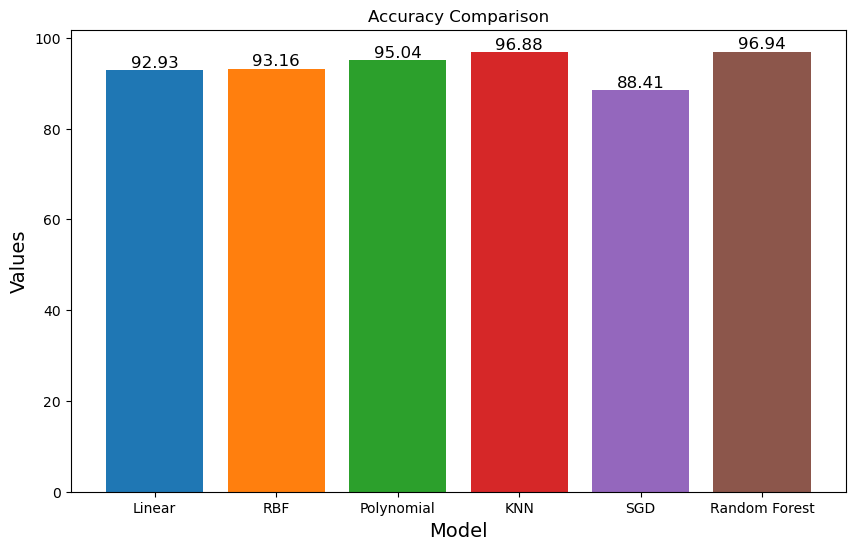

In [43]:
import matplotlib.pyplot as plt
categories = ['Linear', 'RBF', 'Polynomial', 
              'KNN', 'SGD', 'Random Forest']
values = [92.93, 93.16, 95.04, 96.88, 88.41, 96.94]
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

bars = plt.bar(categories, values, color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=12)

plt.title('Accuracy Comparison')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.show()

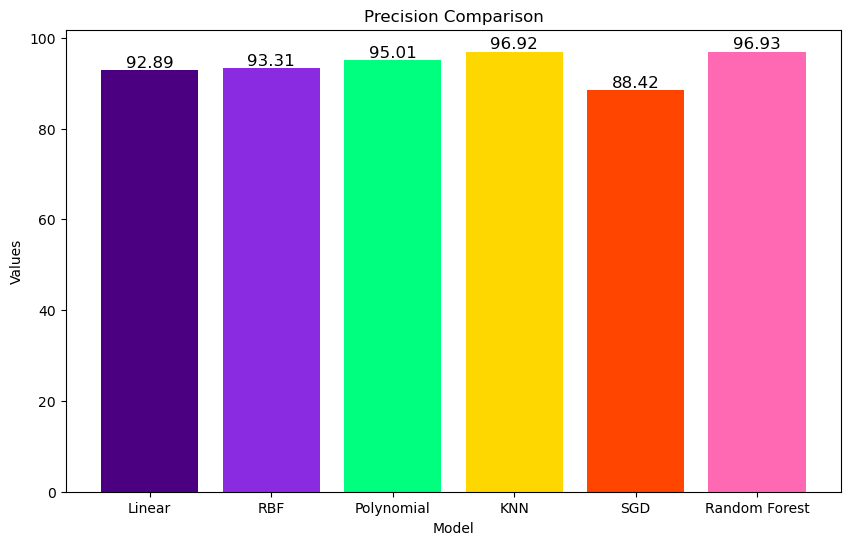

In [45]:
import matplotlib.pyplot as plt
categories = ['Linear', 'RBF', 'Polynomial', 
              'KNN', 'SGD', 'Random Forest']
values = [92.89, 93.31, 95.01, 96.92, 88.42, 96.93]
plt.figure(figsize=(10, 6))
colors =['#4B0082', '#8A2BE2', '#00FF7F', '#FFD700', '#FF4500', '#FF69B4'] 

bars = plt.bar(categories, values, color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=12)


plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Values')

plt.show()

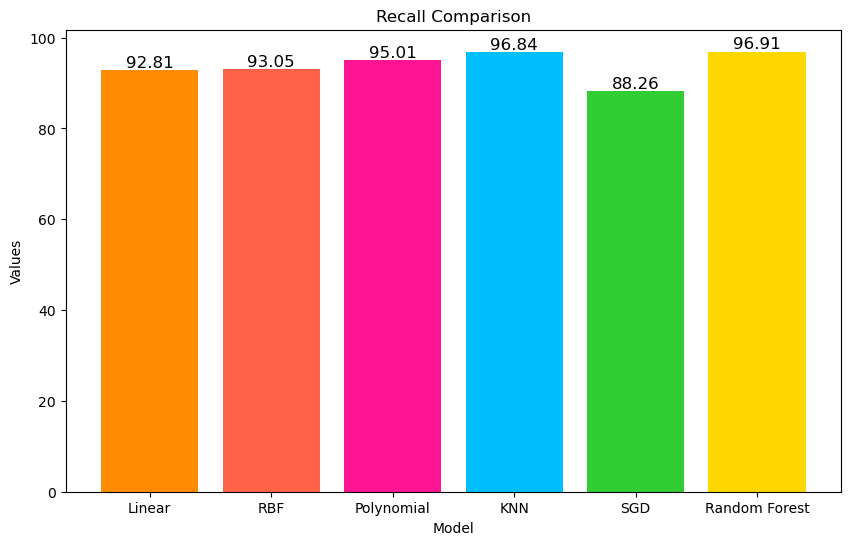

In [47]:
import matplotlib.pyplot as plt
categories = ['Linear', 'RBF', 'Polynomial', 
              'KNN', 'SGD', 'Random Forest']
values = [92.81, 93.05, 95.01, 96.84, 88.26, 96.91]
plt.figure(figsize=(10, 6))
colors = ['#FF8C00', '#FF6347', '#FF1493', '#00BFFF', '#32CD32', '#FFD700']

bars = plt.bar(categories, values, color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=12)

plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Values')

plt.show()

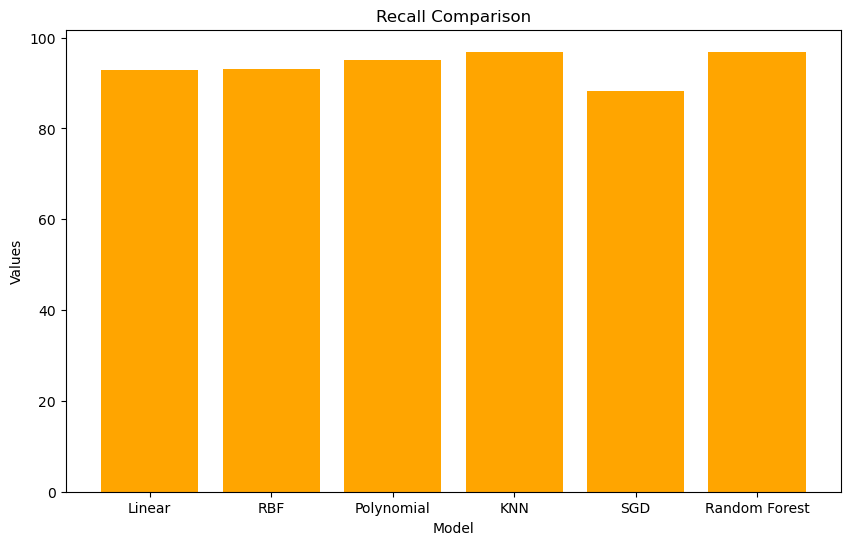

In [27]:
import matplotlib.pyplot as plt
categories = ['Linear', 'RBF', 'Polynomial', 
              'KNN', 'SGD', 'Random Forest']
values = [92.83, 93.13, 95.00, 96.87, 88.17, 96.91]
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='orange')

plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('Values')

plt.show()

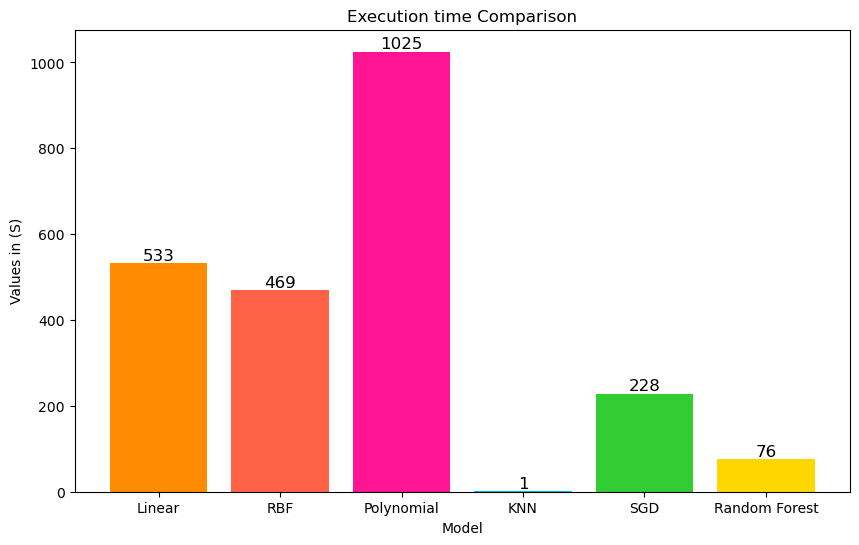

In [51]:
import matplotlib.pyplot as plt
categories = ['Linear', 'RBF', 'Polynomial', 
              'KNN', 'SGD', 'Random Forest']
values = [533, 469, 1025, 1, 228, 76]
plt.figure(figsize=(10, 6))
colors = ['#FF8C00', '#FF6347', '#FF1493', '#00BFFF', '#32CD32', '#FFD700']
bars = plt.bar(categories, values, color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=12)

plt.title('Execution time Comparison')
plt.xlabel('Model')
plt.ylabel('Values in (S)')

plt.show()